                          Нижегородский государственный университет имени Н. И. Лобачевского

                                          Радиофизический факультет

                                            Кафедра математики
                                            

####                 Отчет по лабораторной работе "Численное решение систем линейных уравнений, численное интегрирование"
                                              
                                              Вариант 9
                                                                                  
                                                                                  
                                                                                  
                                                                                  
                                                                                  Выполнила: Емельянова Анастасия, 430 гр.
                                                                                  Проверил: Шиндин А. В.

                                          Нижний Новгород, 2016 год.
                                    

### Содержание
1. Постановка задачи.
2. Описание используемых алгоритмов.
3. Исходный код программы. Результаты работы программы.
4. Анализ результатов.

#### 1. Постановка задачи.
1. Выбрать свой вариант системы (номер варианта остается с предыдущей лабораторной работы). Кроме самой системы в варианте должны быть указаны:
 * число уравнений системы
 * требуемый метод/методы решения системы
 * необходимая относительная точность решения системы
 * требуемый метод вычисления интеграла
 * необходимая относительная точность вычисления интеграла (если не указана, то брать — 0,01).

2.  Вычислить определенный интеграл заданным методом.

3. Построить график подынтегральной функции, а также график зависимости значения интеграла от номера итерации предлагаемого метода численного интегрирования.

3+. (+2 балла) Вычислить определенный интеграл с помощью функции numpy.trapz(…). Результат графически сравнить с результатом из пункта 2. Разницу объяснить.

4. Решить систему заданным методом (взять число уравнений n=1000)

4+. (+2 балла) Решить систему заданным методом (взять число уравнений n=10000)

5. Построить график решения X(i), а также график зависимости нормы решения от номера итерации предлагаемого метода численного решения системы.

5+. (+2 балла) Решить систему с помощью функции numpy.linalg.solve(…). Результат графически сравнить с решением, полученным в пункте 3. Разницу объяснить.

*Система уравнений:*
$$n^2x_i=\sum_{j=1}^n\frac 1 {1+i^2}*j*sin(j)*x_j + \int\limits_{0}^{\infty} sin(t)*e^{-i*t}\,dt,   i=\bar{1,n} $$ 
*Метод решения системы:* метод наискорейшего спуска.

*Относительная точность решения системы $\epsilon_c=0.001$*

*Метод вычисления интеграла:* метод 3/8.

*Относительная точность вычисления интеграла:* $\epsilon_i=0.01$

#### 2. Описание используемых алгоритмов.


**2.1. Вычисление определенного интеграла методом 3/8.**
Используется интерполяционный многочлен Лагранжа. В результате подстановки получается:
$$\int\limits_{a}^{b} f(x)\,dt=\sum_{k=0}^nC_k^{(n)}f(x_k^{(n)})+R_n[f],$$ где
$$C_k^{(n)}=\int\limits_a^b \prod\limits_{i=0,i\ne k}^n {\frac {x-x_i^{(n)}} {x_k^{(n)}-x_i^{(n)}}} \,dx$$
$$R_n[f]=\frac {f^{(n+1)}(\zeta)} {(n+1)!} \int\limits_a^b\prod\limits_{i=0}^n (x-x_i^{(n)}) \,dx$$
**В квадратурной формуле 3/8:**
$$\sum\limits_{k=0}^3 C_k^{(3)}f(x_k^{(3)})=\frac {\beta-\alpha} 8 (f(\alpha)+3f(\frac {2\alpha+\beta} 3) + 3f(\frac {\alpha+2\beta} 3)+f(\beta))$$
$$R_3[f]\le max_{x\in [\alpha,\beta]} |f^{(4)}(x)| \frac {(\alpha-\beta)^5} {6480}$$

**2.2. Решение системы методом наискорейшего спуска**

Как правило, для итерационного (приближенного) метода решения СЛУ существует такая последовательность невырожденных матриц $$H_k, k=1,2,...,$$ что правило построения элементов итерационной последовательности записывается в виде: 
$$x^{k+1}=x^k-H_k(Ax^k-b),$$ или
$$ x^{k+1}=T_kx^k+H_kb,$$
где $T_k=E-H_kE, E$- единичная матрица. 

При этом $\varphi^k=x^k-x_0$ - *вектор ошибки*, $r^k=Ax^k-b$ - *вектор невязки*.

Критерий окончания итерационного процесса при заданной степени точности $\epsilon$:
$$||x^k-x^{k-1}||\eqslantless\epsilon*\frac{1-||T||} {||T||}$$

***Метод наискорейшего спуска:***

Здесь $$H_k=\tau_kE,$$ $$T_k=E-\tau_kA$$
Параметр $\tau_k$ выбирается из условия ортогональности невязок на соседних шагах метода и имеет вид: $$\tau_k=\frac{(r^k,r^k)} {(Ar^k,r^k)}$$
Итерационный процесс имеет вид:
$$x^{k+1}=(E-\tau_kA)x^k+\tau_kEb$$

**3. Исходный код программы. Результат работы программы. **

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import array
import numpy.linalg as lin
%matplotlib inline

Введите номер уравнения: 1000
0.019069999666666258
Значение интеграла:  8.36119484809e-07
Число итераций:  5
Значение интеграла, посчитанное автоматически методом трапеций:  5.49793402458e-07
Разность между ними:  2.86326082351e-07
График подинтегральной функции:


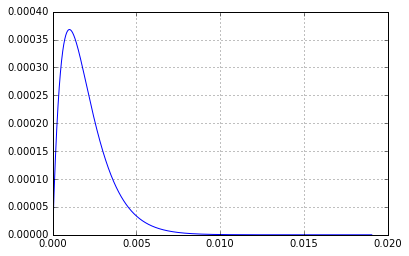

Значение интеграла методом 3/8 от числа итераций:


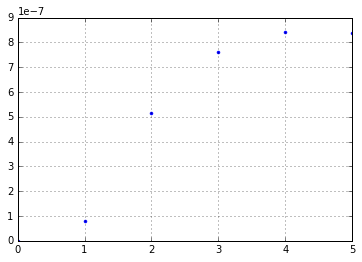

Значение интеграла, вычисленного trapz, от числа итераций:


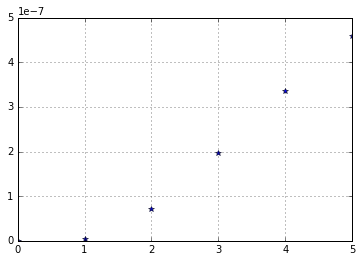

In [2]:
ei=0.01
def f(t,i): 
    return math.sin(t)*math.e**(-i*t)
i=int(input('Введите номер уравнения: '))
a=0; b=6
itm=np.zeros(10000)
Integ=0
Ins=0
D = np.zeros(10000)
it=1
Integ=0
t0=math.atan(1/(i))
tp=t0
while math.fabs(f(tp,i))>10**-10:
    tp+=0.00001
b=tp
xn=np.arange(0,b,0.00001)
yn=[f(x,i) for x in xn]
xni=np.arange(0,b,b/it)
yni=[f(x,i) for x in xni]
for j in range (0,it):
    u=0; v=b/it
    u +=j/it
    v +=j/it
    Ins=(v-u)/8*(f(u,i)+3*f((2*u+v)/3,i)+3*f((u+2*v)/3,i)+f(v,i))
    Integ+=Ins
xni=np.arange(0,b,b/it)
yni=[f(x,i) for x in xni]
itm[it]=np.trapz(yni, x=None, dx=b/it)
D[it]=Integ
it=2
Integ=0
for j in range (0,it):
    u=0; v=b/it
    u +=j/it
    v +=j/it
    Ins=(v-u)/8*(f(u,i)+3*f((2*u+v)/3,i)+3*f((u+2*v)/3,i)+f(v,i))
    Integ+=Ins
xni=np.arange(0,b,b/it)
yni=[f(x,i) for x in xni]
itm[it]=np.trapz(yni, x=None, dx=b/it)
D[it]=Integ
while (D[it]-D[it-1])>D[it]*ei:
    it+=1
    Integ=0
    for j in range (0,it):
        u=0; v=b/it
        u +=j/it
        v +=j/it
        Ins=(v-u)/8*(f(u,i)+3*f((2*u+v)/3,i)+3*f((u+2*v)/3,i)+f(v,i))
        Integ+=Ins
    xni=np.arange(0,b,b/it)
    yni=[f(x,i) for x in xni]
    itm[it]=np.trapz(yni, x=None, dx=b/it)
    D[it]=Integ
xni=np.arange(0,b,b/(it+1))
yni=[f(x,i) for x in xni]
itm[it+1]=np.trapz(yni, x=None, dx=b/(it+1))
n=np.arange(0,it+1,1)
In=[D[k] for k in n]
Ischit=np.trapz(yni, x=None, dx=b/it)
itmi=[itm[l+1] for l in n]
print(b)
print('Значение интеграла: ',D[it])
print('Число итераций: ',it)
print('Значение интеграла, посчитанное автоматически методом трапеций: ',Ischit)
print('Разность между ними: ', abs(D[it]-Ischit))
print('График подинтегральной функции:')
plt.plot(xn, yn)
plt.grid()
plt.show()
print('Значение интеграла методом 3/8 от числа итераций:')
plt.plot(n,In,marker = '.',linestyle='None')
plt.grid()
plt.show()
print('Значение интеграла, вычисленного trapz, от числа итераций:')
plt.plot(n,itmi, marker='*',linestyle='None')
plt.grid()
plt.show()

Введите число уравнений системы: 8000
Введите номер строки 87
Число итераций  3
Решение  [[  7.78768185e-09]
 [  3.11199899e-09]
 [  1.54953545e-09]
 ..., 
 [  1.92522818e-24]
 [  1.92468395e-24]
 [  1.92413994e-24]] 

Норма разности решения встроенной функцией и методом наискорейшего спуска 1.03488504455e-21
time: 286.280887 sec
График зависимости решения методом наискорейшего спуска от числа итераций:


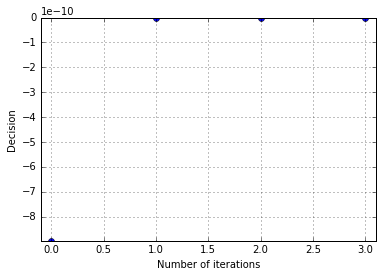

-8.97292615979e-10 2.35539536045e-14 2.35198816642e-14 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
График зависимости решения встроенной функцией от числа итераций: 


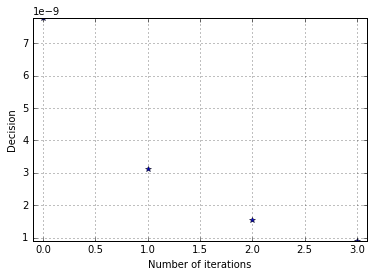

In [3]:
import time, sys
n=int(input('Введите число уравнений системы: '))
iv=int(input('Введите номер строки '))
start = time.time()
es=0.001
E=np.eye(n)
Ap=np.ones((n,n))
X=np.ones((n,1))*5
Xk=np.ones((n,1))*3
B=np.ones((n,1))*2
t=0
b=6
Ischit=np.ones((n,1))
xn=np.arange(0,6,0.1)
U=np.zeros(100)
Tr=np.zeros(100)
o = 0
def f(t,k): 
    return math.sin(t)*math.e**(-k*t)
for k in range (1,n+1):
    yn=[f(t,k) for t in xn]
    Ischit[k-1,0]=np.trapz(yn, x=None, dx=0.1)
    for j in range (1,n+1):
        Ap[k-1,j-1]=1/(1+k*k)*j*math.sin(j)
        B[k-1,0]=-Ischit[k-1,0]
A=Ap-n*n*E
while lin.norm(Xk-X)/lin.norm(X)>es:
    o+=1
    X=Xk
    r=np.dot(A,X)-B
    ro=r.transpose()
    t=np.dot(ro,r)/np.dot(ro,np.dot(A,r))
    H=t*E
    T=E-t*A
    Xk=np.dot(T,X)+np.dot(H,B)
    U[o-1]=Xk[iv,0]
W=lin.solve(A,B)
print('Число итераций ', o)
print('Решение ', Xk,'\n')
print('Норма разности решения встроенной функцией и методом наискорейшего спуска',lin.norm(W-Xk))
print ('time: %f' % (time.time() - start), 'sec')
oo=np.arange(0,o+1,1)
Ug=[U[o] for o in oo]
plt.plot(oo,Ug, marker='o',linestyle='None')
plt.xlabel('Number of iterations')
plt.ylabel('Decision')
plt.title('')
plt.axis([-0.1, o+0.1, min(Ug), max(Ug)])
plt.grid()
print('График зависимости решения методом наискорейшего спуска от числа итераций:')
plt.show()
print(U[0],U[1],U[2],U[3],U[4],U[5],U[6],U[7],U[8],U[9],U[10],U[11],U[12],U[13],U[14],U[15])
print('График зависимости решения встроенной функцией от числа итераций: ')
Tr=[W[o] for o in oo]
plt.plot(oo,Tr, marker='*',linestyle='None')
plt.xlabel('Number of iterations')
plt.ylabel('Decision')
plt.title('')
plt.axis([-0.1, o+0.1, min(Tr), max(Tr)])
plt.grid()
plt.show()

**Анализ результатов и алгоритмов.**

Значения интегралов совпадают по порядку и отличаются в среднем примерно в 2 раза, причем значение интеграла методом 3/8 больше. Это свидетельствует о большей точности этого метода, т. к. метод трапеций достаточно грубый и плохо учитывает быстрое спадание функции и все изгибы подинтегральной кривой.

Решения системы методом наискорейшего спуска и встроенной функцией совпадают достаточно точно, для 8000 уравнений норма разности решения встроенной функцией и методом наискорейшего спуска составляет 1.03488504455^(-21). Решения в одной строке совпадают по порядку. 